# 1. Подготовка данных

In [1]:
#вызов библиотеки Pandas
import pandas as pd
# вызов функции деления выборки
from sklearn.model_selection import train_test_split
# вызов функции порядкового кодирования
from sklearn.preprocessing import OrdinalEncoder
# Вызов библиотеки для создания графиков
import matplotlib.pyplot as plt

In [2]:
# исследование данных
data_churn = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Просмотр данных таблицы data_churn
data_churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Исследование обзей информации таблицы data_churn
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


##### Вывод
1. Таблица data_churn состоит из 14 колонок-признаков.
2. Таблица data_churn состоит из 10000 строк-объектов.
3. Целевой признак модели:
    + Exited "факт ухода клиента"
4. Признаками модели являются:
    + RowNumber "индекс строки в данных";
    + CustomerId "уникальный идентификатор клиента";
    + Surname "фамилия";
    + CreditScore "кредитный рейтинг";
    + Geography "страна проживания";
    + Gender "пол";
    + Age "возраст";
    + Tenure "количество недвижимости у клиента";
    + Balance "баланс на счёте";
    + NumOfProducts "количество продуктов банка, используемых клиентом";
    + HasCrCard "наличие кредитной карты";
    + IsActiveMember "активность клиента";
    + EstimatedSalary "предполагаемая зарплата".

In [5]:
# Удаление из таблицы неинформативных признаков
# Фамилия
data_churn = data_churn.drop(['Surname'], axis = 1)
# Индекс строки в данных
data_churn = data_churn.drop(['RowNumber'], axis = 1)
# Уникальный идентификатор клиента
data_churn = data_churn.drop(['CustomerId'], axis = 1)

##### Вывод
Из таблицы с исходными данными удалены следующие неинфорамционные признаки:
1. RowNumber "индекс строки в данных". Так как это неинформативный показатель - просто индекс признака или его порядковые номер.
2. CustomerId "уникальный идентификатор клиента". Так как это не информативный показатель - индекс клиента или его порядковый номер.
3. Surname "фамилия". Не информативный показатель для прогнозирования.

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64


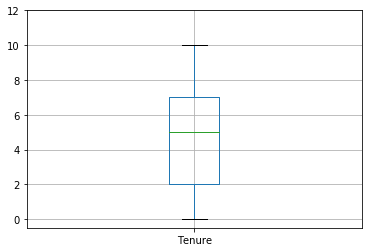

In [6]:
# Построим диаграмму размаха по значениям колонки "количество недвижимости у клиента"
data_churn.boxplot('Tenure')
plt.ylim(-0.5, 12)
print(data_churn['Tenure'].describe())

In [7]:
median_Tenure = data_churn['Tenure'].median()
data_churn['Tenure'] = data_churn['Tenure'].fillna(median_Tenure)
print(data_churn['Tenure'])

0        2.0
1        1.0
2        8.0
3        1.0
4        2.0
        ... 
9995     5.0
9996    10.0
9997     7.0
9998     3.0
9999     5.0
Name: Tenure, Length: 10000, dtype: float64


In [8]:
data_churn.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


##### Вывод
Признак Tenure "количество недвижимости у клиента" содержит пропуски. Вероятно пропуски связаны с отсутствием данных. Вычислим медиану и заполним пропуски медианой. 

In [9]:
# прямое кодирование ко всему датафрейму data_churn c обходом дамми-ловушки
data_ohe = pd.get_dummies(data_churn, drop_first=True)
data_ohe.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
# разделим выборки на обучающе-валидационную и тестовую
dc_TrainValid, dc_Test = train_test_split(data_ohe, test_size=0.20, random_state=2020)

In [11]:
# Просмотр данных обучающе-валидационной выборки
dc_TrainValid.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
5540,737,43,0.0,80090.93,1,1,0,39920.00,1,0,0,1
9880,584,42,3.0,137479.13,1,1,0,25669.10,0,1,0,1
3112,698,40,7.0,105061.74,3,1,0,107815.31,1,0,0,0
4117,561,37,5.0,0.00,2,1,0,83093.25,0,0,0,1
2732,623,48,1.0,108076.33,1,1,0,118855.26,1,1,0,0


In [12]:
# Просмотр данных тестовой выборки
dc_Test.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
4436,508,26,7.0,205962.00,1,1,0,156424.40,0,0,0,1
3829,587,36,1.0,70784.27,1,1,0,30579.82,0,0,0,0
2434,774,52,2.0,56580.93,1,1,0,113266.28,1,0,0,0
4449,666,36,3.0,0.00,2,1,0,35156.54,0,0,0,1
43,834,49,2.0,131394.56,1,0,0,194365.76,1,0,0,0


In [13]:
# разделим обучающе-валидационную выборку отдельные выборки: обучающая и валидационная
dc_Train, dc_Valid = train_test_split(dc_TrainValid, test_size=0.25, random_state=2020)

In [14]:
size_data_ordinal = len(data_ohe.index)
size_dc_Train = len(dc_Train.index)
size_dc_Valid = len(dc_Valid.index)
size_dc_Test = len(dc_Test.index)
print("Обучающая выборка: ", size_dc_Train*100/size_data_ordinal)
print("Валидационная выборка: ", size_dc_Valid*100/size_data_ordinal)
print("Тестовая выборка: ", size_dc_Test*100/size_data_ordinal)

Обучающая выборка:  60.0
Валидационная выборка:  20.0
Тестовая выборка:  20.0


In [15]:
# Просмотр данных обучающей выборки
dc_Train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9982,655,46,7.0,137145.12,1,1,0,115146.40,1,1,0,0
1864,607,45,7.0,123859.60,1,0,1,113051.57,0,0,0,1
5766,556,40,5.0,125909.85,1,1,1,95124.40,0,0,0,1
8632,751,42,4.0,0.00,2,1,1,81442.60,0,0,0,1
9854,681,37,6.0,121231.39,1,1,1,146366.08,0,0,1,0


In [16]:
# Просмотр данных валидационной выборки
dc_Valid.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2577,616,29,5.0,149318.55,1,1,0,140746.13,0,1,0,1
5034,631,29,5.0,96863.52,2,1,1,31613.35,0,1,0,0
3691,590,76,5.0,160979.68,1,0,1,13848.58,0,0,0,0
8176,702,40,3.0,148556.74,1,0,1,146056.29,0,0,0,1
1850,785,33,5.0,136624.60,2,1,1,169117.74,0,1,0,0


In [17]:
# Признаки обучающей выборки
features_Train = dc_Train.drop(['Exited'], axis = 1)
# Целевой признак обучающей выборки
target_Train = dc_Train['Exited']
print(features_Train.shape)
print(target_Train.shape)

(6000, 11)
(6000,)


In [18]:
# Признаки валидационной выборки
features_Valid = dc_Valid.drop(['Exited'], axis = 1)
# Целевой признак валидационной выборки
target_Valid = dc_Valid['Exited']
print(features_Valid.shape)
print(target_Valid.shape)

(2000, 11)
(2000,)


In [19]:
# Признаки тестовой выборки
features_Test = dc_Test.drop(['Exited'], axis = 1)
# Целевой признак тетовой выборки
target_Test = dc_Test['Exited']
print(features_Test.shape)
print(target_Test.shape)

(2000, 11)
(2000,)


#### Вывод
1. Таблица data_churn состоит из 14 колонок-признаков.
2. Таблица data_churn состоит из 10000 строк-объектов.
3. Целевой признак модели:
    + Exited "факт ухода клиента"
4. Признаками модели являются:
    + RowNumber "индекс строки в данных";
    + CustomerId "уникальный идентификатор клиента";
    + Surname "фамилия";
    + CreditScore "кредитный рейтинг";
    + Geography "страна проживания";
    + Gender "пол";
    + Age "возраст";
    + Tenure "количество недвижимости у клиента";
    + Balance "баланс на счёте";
    + NumOfProducts "количество продуктов банка, используемых клиентом";
    + HasCrCard "наличие кредитной карты";
    + IsActiveMember "активность клиента";
    + EstimatedSalary "предполагаемая зарплата".
 
5. Из вышеуказанных признаков модели необходимо удалить следующие: 
    + RowNumber "индекс строки в данных". Так как это неинформативный показатель - просто индекс признака или его порядковые номер;
    + CustomerId "уникальный идентификатор клиента". Так как это не информативный показатель - индекс клиента или его порядковый номер;
    + Surname "фамилия".  
6. Из вышеуказанных признаков модели, числовыми (подлежащие дальнейшиму масштабированию) являются:
    + CreditScore "кредитный рейтинг";
    + Age "возраст";
    + Tenure "количество недвижимости у клиента";
    + Balance "баланс на счёте";
    + NumOfProducts "количество продуктов банка, используемых клиентом";
    + HasCrCard "наличие кредитной карты";
    + IsActiveMember "активность клиента";
    + EstimatedSalary "предполагаемая зарплата".   
6. Признак Tenure "количество недвижимости у клиента" содержит пропуски. Вероятно пропуски связаны с отсутствием данных. Вычислим медиану и заполним пропуски медианой.  
7. Исходные данные разбиты на 3 выборки:
    + Обучающая выборка (dc_Train) содержит 6000 строк, что составляет примерно 60% от исходных данных.
    + Валидационная выборка (dc_Valid) содержит 2000 строк, что составляет 20% от исходных данных.
    + Тестовая выборка (dc_Test) содержит 2000 строк, что составляется примерно 20% от исходных данных.
8. Определен целевой признак для каждой выборки "Exited":
    + target_Train (целевой признак обучающей выборки);
    + target_Valid (целевой признак валидационной выборки);
    + target_Test (целевой признак тестовой выборки).
9. Для обучающей выборки определены признаки features_Train.
10. Для валидационной выборки определены признаки features_Valid.
11. Для тестовой выборки определены признаки features_Test.

# 2. Исследование задачи

In [20]:
# импорт библиотеки numpy
import numpy as np
# импорт структуры для стандартизации данных
from sklearn.preprocessing import StandardScaler
# импорт функции оценки правильности
from sklearn.metrics import accuracy_score
# импорт функции матрицы ошибок
from sklearn.metrics import confusion_matrix
# импорт функции вычисления Полноты
from sklearn.metrics import recall_score
# импорт функции вычисления Точности
from sklearn.metrics import precision_score
# импорт функции вычисления F1 меры
from sklearn.metrics import f1_score
# импорт функции прямого кодирования
from sklearn.preprocessing import OrdinalEncoder
# импорт функции AUC-ROC
from sklearn.metrics import roc_auc_score

In [21]:
features_Train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9982,655,46,7.0,137145.12,1,1,0,115146.40,1,0,0
1864,607,45,7.0,123859.60,1,0,1,113051.57,0,0,1
5766,556,40,5.0,125909.85,1,1,1,95124.40,0,0,1
8632,751,42,4.0,0.00,2,1,1,81442.60,0,0,1
9854,681,37,6.0,121231.39,1,1,1,146366.08,0,1,0


In [22]:
# масштабирование признаков
numeric = ['CreditScore',
           'Age',
           'Tenure',
           'Balance',
           'NumOfProducts',
           'HasCrCard',
           'IsActiveMember',
           'EstimatedSalary'
          ]

scaler = StandardScaler()
scaler.fit(features_Train[numeric])

features_Train[numeric] = scaler.transform(features_Train[numeric])
features_Valid[numeric] = scaler.transform(features_Valid[numeric])
features_Test[numeric] = scaler.transform(features_Test[numeric])

print(features_Train.head())
print(features_Valid.head())
print(features_Test.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
9982     0.058885  0.677113  0.730445  0.966933      -0.922538   0.640654   
1864    -0.436191  0.580942  0.730445  0.755134      -0.922538  -1.560906   
5766    -0.962209  0.100083  0.006216  0.787819      -0.922538   0.640654   
8632     1.049036  0.292426 -0.355898 -1.219447       0.786393   0.640654   
9854     0.327051 -0.188433  0.368331  0.713235      -0.922538   0.640654   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
9982       -1.029090         0.255379                  1                0   
1864        0.971733         0.218846                  0                0   
5766        0.971733        -0.093799                  0                0   
8632        0.971733        -0.332406                  0                0   
9854        0.971733         0.799842                  0                1   

      Gender_Male  
9982            0  
1864            1  
5766          

##### Вывод
1. Из признаков модели, числовыми (подлежащие дальнейшиму масштабированию) являются:
    + CreditScore "кредитный рейтинг";
    + Age "возраст";
    + Tenure "количество недвижимости у клиента";
    + Balance "баланс на счёте";
    + NumOfProducts "количество продуктов банка, используемых клиентом";
    + HasCrCard "наличие кредитной карты";
    + IsActiveMember "активность клиента";
    + EstimatedSalary "предполагаемая зарплата".
2. Масштабирование проведено на выборках:
    + Обучающая выборка;
    + Валидационная выборка;
    + Тестовая выборка.

Для решения задачи классификации далее рассмотрим обучение модели следующими методами:
1. "Дерево решений";
2. "Случайный лес";
3. "Логистическая регрессия".

#### Исследование модели "Решающее дерево"

In [23]:
# импорт из библиотеки sklearn структуры данных модели "Решающее дерево"
from sklearn.tree import DecisionTreeClassifier

In [24]:
# создание модели методом "Решающее дерево"
model_DTC = DecisionTreeClassifier(random_state=54321, max_depth=8)

# обучение модели
model_DTC.fit(features_Train, target_Train)

# предсказание модели на обучающей выборке
train_predictions_DTC = model_DTC.predict(features_Train)

accuracy_train: 0.8832
0    0.863
1    0.137
dtype: float64
accuracy_valid: 0.8605


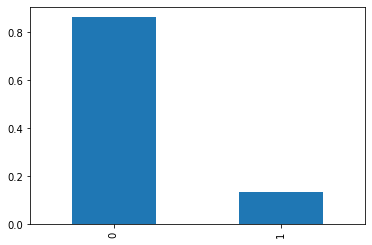

In [25]:
# проверка правильности модели обучающей выборки
accuracy_train_DTC = accuracy_score(target_Train, train_predictions_DTC)
print("accuracy_train: {:.4f}".format(accuracy_train_DTC))

# предсказание модели валидной выборки    
valid_predictions_DTC = pd.Series(model_DTC.predict(features_Valid))
class_frequency = valid_predictions_DTC.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

# проверка правильности модели валидной выборки с учетом значений гиперпараметра
accuracy_valid_DTC = accuracy_score(target_Valid, valid_predictions_DTC)
print("accuracy_valid: {:.4f}".format(accuracy_valid_DTC))

In [26]:
# построим матрицу ошибок
print(confusion_matrix(target_Valid, valid_predictions_DTC))

[[1524   77]
 [ 202  197]]


In [27]:
# полнота
recall_DTC = recall_score(target_Valid, valid_predictions_DTC)
print("Полнота:", recall_DTC)

# точность
precision_DTC = precision_score(target_Valid, valid_predictions_DTC)
print("Точность:", precision_DTC)

# расчет f1 меры
f1_DTC = f1_score(target_Valid, valid_predictions_DTC)
print("F1-мера:", f1_DTC)

# расчитаем AUC-ROC для модели "Решающее дерево"
probabilities_valid_DTC = model_DTC.predict_proba(features_Valid)
probabilities_one_valid_DTC = probabilities_valid_DTC[:, 1]
auc_roc_DTC = roc_auc_score(target_Valid, probabilities_one_valid_DTC)
print("AUC-ROC:", auc_roc_DTC)

Полнота: 0.49373433583959897
Точность: 0.718978102189781
F1-мера: 0.5854383358098069
AUC-ROC: 0.8163569448292811


In [28]:
# Оформим результаты в таблицу
df_models = pd.DataFrame({'model':['DecisionTreeClassifier'],'f1':[f1_DTC], 'AUCROC':[auc_roc_DTC]}) 
df_models

,model,f1,AUCROC
0,DecisionTreeClassifier,0.585438,0.816357


##### Вывод
1. При исследовании модели "Решающее дерево" удалось достичь значени F1=0.585.

#### Исследование модели "Случайный лес"

In [29]:
# импорт из библиотеки sklearn структуры данных модели "Случайный лес"
from sklearn.ensemble import RandomForestClassifier

In [30]:
# создание модели методом "Случайный лес"
model_RFC = RandomForestClassifier(random_state=54321, max_depth=8, n_estimators=300)

# обучение модели
model_RFC.fit(features_Train, target_Train)
    
# предсказание модели на обучающей выборке
train_predictions_RFC = model_RFC.predict(features_Train)

accuracy_train: 0.8835
0    0.892
1    0.108
dtype: float64
accuracy_valid: 0.8595


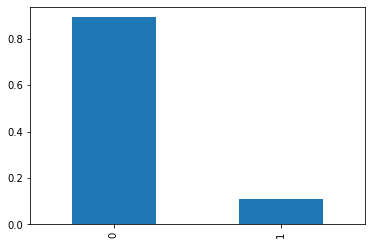

In [31]:
# проверка правильности модели обучающей выборки
accuracy_train_RFC = accuracy_score(target_Train, train_predictions_RFC)
print("accuracy_train: {:.4f}".format(accuracy_train_RFC))
    
# предсказание модели валидной выборки
valid_predictions_RFC = pd.Series(model_RFC.predict(features_Valid))
class_frequency = valid_predictions_RFC.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
      
# проверка правильности модели валидной выборки
accuracy_valid_RFC = accuracy_score(target_Valid, valid_predictions_RFC)
print("accuracy_valid: {:.4f}".format(accuracy_valid_RFC))

In [32]:
# построим матрицу ошибок
print(confusion_matrix(target_Valid, valid_predictions_RFC))

[[1552   49]
 [ 232  167]]


In [33]:
# полнота
recall_RFC = recall_score(target_Valid, valid_predictions_RFC)
print("Полнота:", recall_RFC)

# точность
precision_RFC = precision_score(target_Valid, valid_predictions_RFC)
print("Точность:", precision_RFC)

# расчет f1 меры
f1_RFC = f1_score(target_Valid, valid_predictions_RFC)
print("F1-мера:", f1_RFC)

# расчитаем AUC-ROC для модели "Случайный лес"
probabilities_valid_RFC = model_RFC.predict_proba(features_Valid)
probabilities_one_valid_RFC = probabilities_valid_RFC[:, 1]
auc_roc_RFC = roc_auc_score(target_Valid, probabilities_one_valid_RFC)
print("AUC-ROC:", auc_roc_RFC)

Полнота: 0.41854636591478694
Точность: 0.7731481481481481
F1-мера: 0.5430894308943088
AUC-ROC: 0.8617092387433293


In [34]:
# Оформим результаты в таблицу
df_models.loc[1] = ['RandomForestClassifier', f1_RFC, auc_roc_RFC]
df_models

,model,f1,AUCROC
0,DecisionTreeClassifier,0.585438,0.816357
1,RandomForestClassifier,0.543089,0.861709


#### Вывод
1. При исследовании модели "Случайный лес" удалось достичь значени F1=0.543.

#### Исследование модели "Логистическая регрессия"

0    0.927
1    0.073
dtype: float64


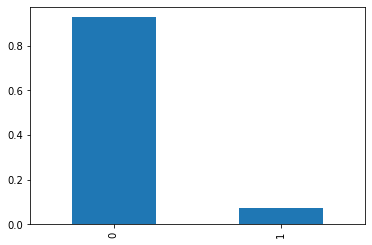

In [35]:
# импорт из библиотеки sklearn структуры данных модели "Логистическая регрессия"
from sklearn.linear_model import LogisticRegression
# создание модели метода "Логистическая регрессия"
model_LR = LogisticRegression(random_state=54321, solver='liblinear')

# обучение модели
model_LR.fit(features_Train, target_Train)

# Проверка адекватности модели
valid_predictions_LR = pd.Series(model_LR.predict(features_Valid))

# Анализ частот классов в результатах предсказаний
class_frequency = valid_predictions_LR.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [36]:
# построим матрицу ошибок для Логистической регрессии
print(confusion_matrix(target_Valid, valid_predictions_LR))

[[1538   63]
 [ 316   83]]


In [37]:
# полнота
recall_LR = recall_score(target_Valid, valid_predictions_LR)
print("Полнота:", recall_LR)

# точность
precision_LR = precision_score(target_Valid, valid_predictions_LR)
print("Точность:", precision_LR)

# расчет f1 меры
f1_LR = f1_score(target_Valid, valid_predictions_LR)
print("F1-мера:", f1_LR)

# расчитаем AUC-ROC для модели "Логистическая регрессия"
probabilities_valid_LR = model_LR.predict_proba(features_Valid)
probabilities_one_valid_LR = probabilities_valid_LR[:, 1]
auc_roc_LR = roc_auc_score(target_Valid, probabilities_one_valid_LR)
print("AUC-ROC:", auc_roc_LR)

Полнота: 0.20802005012531327
Точность: 0.5684931506849316
F1-мера: 0.3045871559633027
AUC-ROC: 0.743592272373626


In [38]:
# Оформим результаты в таблицу
df_models.loc[2] = ['LogisticRegression', f1_LR, auc_roc_LR]
df_models

,model,f1,AUCROC
0,DecisionTreeClassifier,0.585438,0.816357
1,RandomForestClassifier,0.543089,0.861709
2,LogisticRegression,0.304587,0.743592


##### Вывод
1. При исследовании модели "Логистическая регрессия" удалось достичь значени F1=0.305.

### Вывод
1. При исследовании модели "Решающее дерево" удалось достичь значени F1=0.585.
2. При исследовании модели "Случайный лес" удалось достичь значени F1=0.543.
3. При исследовании модели "Логистическая регрессия" удалось достичь значени F1=0.305.
4. Модели "Случайный лес" и "Логистическая регрессия" не смогли достичь близкого результата F1=0.59. Далее посмотрим, возможно борьба с дисбалансом помежет исправить результат.

# 3. Борьба с дисбалансом

In [39]:
# импорт функции перетасовки данных
from sklearn.utils import shuffle
# импорт функции PR-кривой
from sklearn.metrics import precision_recall_curve
# Вызов библиотеки для создания графиков
import matplotlib.pyplot as plt
# импорт функции roc_curve()
from sklearn.metrics import roc_curve
# импорт функции classification_report()
from sklearn.metrics import classification_report

In [40]:
# разделим обучающую выборку на положительные и отрицательные объекты
# расчитаем количество объектов в каждом классе
features_Zeros = features_Train[target_Train == 0]
features_Ones = features_Train[target_Train == 1]
target_Zeros = target_Train[target_Train == 0]
target_Ones = target_Train[target_Train == 1]
print("Количество объектов в классе 0: ",len(features_Zeros.index))
print("Количество объектов в классе 1: ",len(features_Ones.index))

Количество объектов в классе 0:  4781
Количество объектов в классе 1:  1219


#### Вывод
1. В классе 1 количество объектов: 4781.
2. В классе 0 количество объектов: 1219
3. Количество объектов в классе 0 в 4 раза меньше чем количество объектов класса 1.
4. Классы не сбалансированы

#### Борьба с дисбалансом с помощью увеличения выборки

In [41]:
# Объединим объекты положительного и отрицательного классов в новые признаки
# Количество повторений котрые необходимы, чтобы число объектов в классах 0 и 1 примерно сравнялись
repeat = round(len(features_Zeros.index)/len(features_Ones.index)) # 4
    
# увеличение выборки
# Функция upsample(features, target, repeat) увеличивает число объектов класса 1 в «repeat» раз
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_Train, target_Train, repeat)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9657, 11)
(9657,)


In [42]:
print("Количество объектов в классе 0: ",len(features_upsampled[target_Train == 0].index))
print("Количество объектов в классе 1: ",len(features_upsampled[target_Train == 1].index))

Количество объектов в классе 0:  4781
Количество объектов в классе 1:  4876


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Вывод
1. Классы 0 и 1 по количеству объектов примерно сбалансированы

In [43]:
# создание модели "Решающее дерево"
model_DTC1 = DecisionTreeClassifier(random_state=54321,
                                   class_weight = 'balanced',
                                   max_depth=8,
                                   min_samples_leaf=2,
                                   min_samples_split=2
                                   )
# обучение модели
model_DTC1.fit(features_upsampled, target_upsampled)
predicted_Valid11 = model_DTC1.predict(features_Valid)

In [44]:
# полнота
recall_DTC1 = recall_score(target_Valid, predicted_Valid11)
print("Полнота:", recall_DTC1)

# точность
precision_DTC1 = precision_score(target_Valid, predicted_Valid11)
print("Точность:", precision_DTC1)

# расчет f1 меры
f1_DTC1 = f1_score(target_Valid, predicted_Valid11)
print("F1-мера:", f1_DTC1)

# расчитаем AUC-ROC для модели "Решающее дерево"
probabilities_valid_DTC1 = model_DTC1.predict_proba(features_Valid)
probabilities_one_valid_DTC1 = probabilities_valid_DTC1[:, 1]
auc_roc_DTC1 = roc_auc_score(target_Valid, probabilities_one_valid_DTC1)
print("AUC-ROC:", auc_roc_DTC1)

Полнота: 0.7218045112781954
Точность: 0.43373493975903615
F1-мера: 0.541862652869238
AUC-ROC: 0.8082010147166793


In [45]:
# Оформим результаты в таблицу
df_models1 = pd.DataFrame({'model':['DecisionTreeClassifier'],'f1_upsampled':[f1_DTC1], 'AUCROC_upsampled':[auc_roc_DTC1]}) 
df_models1

,model,f1_upsampled,AUCROC_upsampled
0,DecisionTreeClassifier,0.541863,0.808201


#### Вывод
1. При исследовании модели "Решающее дерево" удалось достичь значени F1=0.542.

In [46]:
# создание модели "Случайный лес"
model_RFC1 = RandomForestClassifier(random_state=54321,
                                   max_depth=8,
                                   class_weight = 'balanced',
                                   n_estimators=300)
# обучение модели
model_RFC1.fit(features_upsampled, target_upsampled)
predicted_Valid12 = model_RFC1.predict(features_Valid)

In [47]:
# полнота
recall_RFC1 = recall_score(target_Valid, predicted_Valid12)
print("Полнота:", recall_RFC1)

# точность
precision_RFC1 = precision_score(target_Valid, predicted_Valid12)
print("Точность:", precision_RFC1)

# расчет f1 меры
f1_RFC1 = f1_score(target_Valid, predicted_Valid12)
print("F1-мера:", f1_RFC1)

# расчитаем AUC-ROC для модели "Случайный лес"
probabilities_valid_RFC1 = model_RFC1.predict_proba(features_Valid)
probabilities_one_valid_RFC1 = probabilities_valid_RFC1[:, 1]
auc_roc_RFC1 = roc_auc_score(target_Valid, probabilities_one_valid_RFC1)
print("AUC-ROC:", auc_roc_RFC1)

Полнота: 0.6992481203007519
Точность: 0.5284090909090909
F1-мера: 0.6019417475728156
AUC-ROC: 0.8570849359501188


In [48]:
# Оформим результаты в таблицу
df_models1.loc[1] = ['RandomForestClassifier', f1_RFC1, auc_roc_RFC1]
df_models1

,model,f1_upsampled,AUCROC_upsampled
0,DecisionTreeClassifier,0.541863,0.808201
1,RandomForestClassifier,0.601942,0.857085


#### Вывод
1. При исследовании модели "Случайный лес" удалось достичь значени F1=0.602.

In [49]:
# создание модели "Логистическая регрессия"
model_LR1 = LogisticRegression(random_state=54321, 
                               solver='liblinear',
                               class_weight='balanced')
# обучение модели
model_LR1.fit(features_upsampled,target_upsampled)
predicted_Valid13 = model_LR1.predict(features_Valid)

In [50]:
# полнота
recall_LR1 = recall_score(target_Valid, predicted_Valid13)
print("Полнота:", recall_LR1)

# точность
precision_LR1 = precision_score(target_Valid, predicted_Valid13)
print("Точность:", precision_LR1)

# расчет f1 меры
f1_LR1 = f1_score(target_Valid, predicted_Valid13)
print("F1-мера:", f1_LR1)

# расчитаем AUC-ROC для модели "Логистическая регрессия"
probabilities_valid_LR1 = model_LR1.predict_proba(features_Valid)
probabilities_one_valid_LR1 = probabilities_valid_LR1[:, 1]
auc_roc_LR1 = roc_auc_score(target_Valid, probabilities_one_valid_LR1)
print("AUC-ROC:", auc_roc_LR1)

Полнота: 0.6641604010025063
Точность: 0.37011173184357543
F1-мера: 0.47533632286995514
AUC-ROC: 0.7464178873166676


In [51]:
# Оформим результаты в таблицу
df_models1.loc[2] = ['LogisticRegression', f1_LR1, auc_roc_LR1]
df_models1

,model,f1_upsampled,AUCROC_upsampled
0,DecisionTreeClassifier,0.541863,0.808201
1,RandomForestClassifier,0.601942,0.857085
2,LogisticRegression,0.475336,0.746418


#### Вывод
1. При исследовании модели "Логистическая регрессия" удалось достичь значени F1=0.475.

#### Вывод
1. Модель "Решающее дерево":
    + было: 0.5854383358098069
    + стало: 0.541862652869238
2. Модель "Случаный лес":
    + было: 0.5430894308943088
    + стало: 0.6019417475728156
3. Модель "Логистическая регрессия":
    + было: 0.3045871559633027
    + стало: 0.47533632286995514
4. Для модели "Решающее дерево" борьба с дисбалансом и увеличение выборки привело к уменьшению f1 меры.
5. Для модели "Случайный лес" борьба с дисбалансом и увеличение выборки привело к значительному увеличению f1 меры.
6. Для модели "Логистическая регрессия" борьба с дисбалансом и увеличение выборки привело к уменьшению f1 меры

#### Борьба с дисбалансом с помощью уменьшения выборки

In [52]:
# Доля отрицательных объектов, которые нужно сохранить
fraction = len(features_Ones.index)/len(features_Zeros.index) 

# уменьшение выборки
# Функция downsample(features, target, repeat) уменьшает число объектов класса 1 в «fraction» раз
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Объединим объекты положительного и отрицательного классов в новые признаки
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_Train, target_Train, fraction)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2438, 11)
(2438,)


In [53]:
print("Количество объектов в классе 0: ",len(features_downsampled[target_Train == 0].index))
print("Количество объектов в классе 1: ",len(features_downsampled[target_Train == 1].index))

Количество объектов в классе 0:  1219
Количество объектов в классе 1:  1219


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Вывод
1. Классы 0 и 1 по количеству объектов сбалансированы.

In [54]:
# создание модели методом "Решающее дерево"
model_DTC2 = DecisionTreeClassifier(random_state=54321,
                                   class_weight = 'balanced',
                                   max_depth=8,
                                   min_samples_leaf=2,
                                   min_samples_split=2
                                   )
# обучим модель
model_DTC2.fit(features_downsampled,target_downsampled)
predicted_Valid21 = model_DTC2.predict(features_Valid)

In [55]:
# полнота
recall_DTC2 = recall_score(target_Valid, predicted_Valid21)
print("Полнота:", recall_DTC2)

# точность
precision_DTC2 = precision_score(target_Valid, predicted_Valid21)
print("Точность:", precision_DTC2)

# расчет f1 меры
f1_DTC2 = f1_score(target_Valid, predicted_Valid21)
print("F1-мера:", f1_DTC2)

# расчитаем AUC-ROC для модели "Решающее дерево"
probabilities_valid_DTC2 = model_DTC2.predict_proba(features_Valid)
probabilities_one_valid_DTC2 = probabilities_valid_DTC2[:, 1]
auc_roc_DTC2 = roc_auc_score(target_Valid, probabilities_one_valid_DTC2)
print("AUC-ROC:", auc_roc_DTC2)

Полнота: 0.7218045112781954
Точность: 0.4311377245508982
F1-мера: 0.5398313027179007
AUC-ROC: 0.7918304505799163


In [56]:
# Оформим результаты в таблицу
df_models2 = pd.DataFrame({'model':['DecisionTreeClassifier'],'f1_downsampled':[f1_DTC2], 'AUCROC_downsampled':[auc_roc_DTC2]}) 
df_models2

,model,f1_downsampled,AUCROC_downsampled
0,DecisionTreeClassifier,0.539831,0.79183


In [57]:
# создание модели методом "Случайный лес"
model_RFC2 = RandomForestClassifier(random_state=54321,
                                   max_depth=8,
                                   class_weight = 'balanced',
                                   n_estimators=300)
# Обучим модель
model_RFC2.fit(features_downsampled,target_downsampled)
predicted_Valid22 = model_RFC2.predict(features_Valid)

In [58]:
# полнота
recall_RFC2 = recall_score(target_Valid, predicted_Valid22)
print("Полнота:", recall_RFC2)

# точность
precision_RFC2 = precision_score(target_Valid, predicted_Valid22)
print("Точность:", precision_RFC2)

# расчет f1 меры
f1_RFC2 = f1_score(target_Valid, predicted_Valid22)
print("F1-мера:", f1_RFC2)

# расчитаем AUC-ROC для модели "Случайный лес"
probabilities_valid_RFC2 = model_RFC2.predict_proba(features_Valid)
probabilities_one_valid_RFC2 = probabilities_valid_RFC2[:, 1]
auc_roc_RFC2 = roc_auc_score(target_Valid, probabilities_one_valid_RFC2)
print("AUC-ROC:", auc_roc_RFC2)

Полнота: 0.731829573934837
Точность: 0.49158249158249157
F1-мера: 0.5881168177240684
AUC-ROC: 0.8550717831430543


In [59]:
# Оформим результаты в таблицу
df_models2.loc[1] = ['RandomForestClassifier', f1_RFC2, auc_roc_RFC2]
df_models2

,model,f1_downsampled,AUCROC_downsampled
0,DecisionTreeClassifier,0.539831,0.791830
1,RandomForestClassifier,0.588117,0.855072


In [60]:
# обучение на логистической регрессии
model_LR2 = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')

# обучим модель
model_LR2.fit(features_downsampled,target_downsampled)
predicted_Valid23 = model_LR2.predict(features_Valid)

In [61]:
# полнота
recall_LR2 = recall_score(target_Valid, predicted_Valid23)
print("Полнота:", recall_LR2)

# точность
precision_LR2 = precision_score(target_Valid, predicted_Valid23)
print("Точность:", precision_LR2)

# расчет f1 меры
f1_LR2 = f1_score(target_Valid, predicted_Valid23)
print("F1-мера:", f1_LR2)

# расчитаем AUC-ROC для модели "Логистическая регрессия"
probabilities_valid_LR2 = model_LR2.predict_proba(features_Valid)
probabilities_one_valid_LR2 = probabilities_valid_LR2[:, 1]
auc_roc_LR2 = roc_auc_score(target_Valid, probabilities_one_valid_LR2)
print("AUC-ROC:", auc_roc_LR2)

Полнота: 0.6641604010025063
Точность: 0.364010989010989
F1-мера: 0.4702750665483585
AUC-ROC: 0.7464992900740296


In [62]:
# Оформим результаты в таблицу
df_models2.loc[2] = ['LogisticRegression', f1_LR2, auc_roc_LR2]
df_models2

,model,f1_downsampled,AUCROC_downsampled
0,DecisionTreeClassifier,0.539831,0.791830
1,RandomForestClassifier,0.588117,0.855072
2,LogisticRegression,0.470275,0.746499


#### Вывод
1. Модель "Решающее дерево":
    + было: 0.5854383358098069
    + стало: 0.5398313027179007
2. Модель "Случаный лес":
    + было: 0.5430894308943088
    + стало: 0.5881168177240684
3. Модель "Логистическая регрессия":
    + было: 0.3045871559633027
    + стало: 0.4702750665483585
4. Для модели "Решающее дерево" борьба с дисбалансом и уменьшение выборки привело к уменьшению f1 меры.
5. Для модели "Случайный лес" борьба с дисбалансом и уменьшение выборки привело к незначительному увеличению f1 меры.
6. Для модели "Логистическая регрессия" борьба с дисбалансом и уменьшение выборки привело к значительному увеличнию f1 меры

#### Исследование изменений порогов

In [63]:
# исследование изменение порога на метрики модели "Решающее дерево"
probabilities_valid_DTC = model_DTC.predict_proba(features_Valid)
probabilities_one_valid_DTC = probabilities_valid_DTC[:, 1]
# вероятность положительного класса на валидной выборке
print(probabilities_one_valid_DTC[:5])

# Перебор порогов. Найдем точность и полноту для каждого порога
for threshold in np.arange(0, 1, 0.1):
    predicted_valid_DTC = probabilities_one_valid_DTC > threshold
    precision = precision_score(target_Valid, predicted_valid_DTC)
    recall = recall_score(target_Valid, predicted_valid_DTC)
    f1 = f1_score(target_Valid, predicted_valid_DTC)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

[0.22689076 0.03731343 0.         0.         0.03731343]
Порог = 0.00 | Точность = 0.198, Полнота = 0.947, F1 = 0.328
Порог = 0.10 | Точность = 0.354, Полнота = 0.810, F1 = 0.493
Порог = 0.20 | Точность = 0.506, Полнота = 0.682, F1 = 0.581
Порог = 0.30 | Точность = 0.605, Полнота = 0.591, F1 = 0.598
Порог = 0.40 | Точность = 0.667, Полнота = 0.546, F1 = 0.601
Порог = 0.50 | Точность = 0.719, Полнота = 0.494, F1 = 0.585
Порог = 0.60 | Точность = 0.716, Полнота = 0.474, F1 = 0.570
Порог = 0.70 | Точность = 0.815, Полнота = 0.343, F1 = 0.483
Порог = 0.80 | Точность = 0.851, Полнота = 0.286, F1 = 0.428
Порог = 0.90 | Точность = 0.880, Полнота = 0.221, F1 = 0.353


#### Вывод
1. Максимальный порог для модели "Решающее дерево" - 0.4. При этом значение порога, показатель F1 достигает максимального значения - 0.601

In [64]:
# исследование изменение порога на метрики модели "Случайный лес"
probabilities_valid_RFC = model_RFC.predict_proba(features_Valid)
probabilities_one_valid_RFC = probabilities_valid_RFC[:, 1]
# вероятность положительного класса на валидной выборке
print(probabilities_one_valid_RFC[:5])

# Перебор порогов. Найдем точность и полноту для каждого порога
for threshold in np.arange(0, 1, 0.1):
    predicted_valid_RFC = probabilities_one_valid_RFC > threshold
    precision = precision_score(target_Valid, predicted_valid_RFC)
    recall = recall_score(target_Valid, predicted_valid_RFC)
    f1 = f1_score(target_Valid, predicted_valid_RFC)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

[0.19240712 0.05603038 0.19829258 0.09547864 0.07768708]
Порог = 0.00 | Точность = 0.200, Полнота = 1.000, F1 = 0.333
Порог = 0.10 | Точность = 0.310, Полнота = 0.925, F1 = 0.464
Порог = 0.20 | Точность = 0.484, Полнота = 0.752, F1 = 0.589
Порог = 0.30 | Точность = 0.619, Полнота = 0.591, F1 = 0.605
Порог = 0.40 | Точность = 0.727, Полнота = 0.501, F1 = 0.593
Порог = 0.50 | Точность = 0.773, Полнота = 0.419, F1 = 0.543
Порог = 0.60 | Точность = 0.903, Полнота = 0.326, F1 = 0.479
Порог = 0.70 | Точность = 0.978, Полнота = 0.226, F1 = 0.367
Порог = 0.80 | Точность = 1.000, Полнота = 0.095, F1 = 0.174
Порог = 0.90 | Точность = 1.000, Полнота = 0.023, F1 = 0.044


#### Вывод
1. Максимальный порог для модели "Случайный лес" - 0.3. При этом значение порога, показатель F1 достигает максимального значения - 0.605

In [65]:
# исследование изменение порога на метрики модели "Логистическая регрессия"
probabilities_valid_LR = model_LR.predict_proba(features_Valid)
probabilities_one_valid_LR = probabilities_valid_LR[:, 1]
# вероятность положительного класса на валидной выборке
print(probabilities_one_valid_LR[:5])

# Перебор порогов. Найдем точность и полноту для каждого порога
for threshold in np.arange(0, 1, 0.1):
    predicted_valid_LR = probabilities_one_valid_LR > threshold
    precision = precision_score(target_Valid, predicted_valid_LR)
    recall = recall_score(target_Valid, predicted_valid_LR)
    f1 = f1_score(target_Valid, predicted_valid_LR)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

[0.22245745 0.10400097 0.74109486 0.08974674 0.13969065]
Порог = 0.00 | Точность = 0.200, Полнота = 1.000, F1 = 0.333
Порог = 0.10 | Точность = 0.265, Полнота = 0.867, F1 = 0.406
Порог = 0.20 | Точность = 0.355, Полнота = 0.659, F1 = 0.461
Порог = 0.30 | Точность = 0.438, Полнота = 0.491, F1 = 0.463
Порог = 0.40 | Точность = 0.490, Полнота = 0.323, F1 = 0.390
Порог = 0.50 | Точность = 0.568, Полнота = 0.208, F1 = 0.305
Порог = 0.60 | Точность = 0.643, Полнота = 0.113, F1 = 0.192
Порог = 0.70 | Точность = 0.667, Полнота = 0.055, F1 = 0.102
Порог = 0.80 | Точность = 0.636, Полнота = 0.018, F1 = 0.034
Порог = 0.90 | Точность = 1.000, Полнота = 0.003, F1 = 0.005


#### Вывод
1. Максимальный порог для модели "Логистическая регрессия" - 0.3. При этом значение порога, показатель F1 достигает максимального значения - 0.463

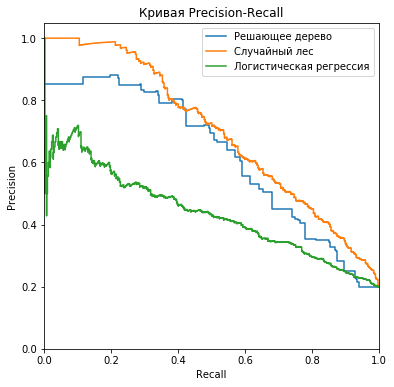

In [66]:
# Построим PR-кривую для модели "Решающее дерево"
precision_d, recall_d, thresholds_d = precision_recall_curve(target_Valid, probabilities_valid_DTC[:, 1])
# Построим PR-кривую для модели "Случайный лес"
precision_r, recall_r, thresholds_r = precision_recall_curve(target_Valid, probabilities_valid_RFC[:, 1])
# Построим PR-кривую для модели "Логистическая регрессия"
precision_l, recall_l, thresholds_l = precision_recall_curve(target_Valid, probabilities_valid_LR[:, 1])
plt.figure(figsize=(6, 6))
plt.step(recall_d, precision_d, where='post', label = "Решающее дерево")
plt.step(recall_r, precision_r, where='post', label = "Случайный лес")
plt.step(recall_l, precision_l, where='post', label = "Логистическая регрессия")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.legend() 
plt.show()

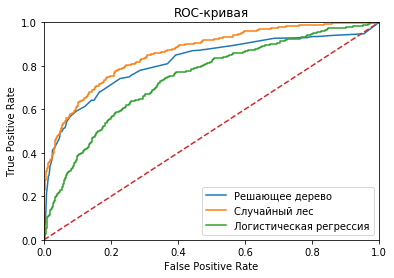

In [67]:
# построим ROC-кривую для модели "Решающее дерево"
fpr_d, tpr_d, thresholds_d = roc_curve(target_Valid, probabilities_one_valid_DTC)
# построим ROC-кривую для модели "Случайный лес"
fpr_r, tpr_r, thresholds_r = roc_curve(target_Valid, probabilities_one_valid_RFC)
# построим ROC-кривую для модели "Логистическая регрессия"
fpr_l, tpr_l, thresholds_l = roc_curve(target_Valid, probabilities_one_valid_LR)
plt.figure()
plt.plot(fpr_d, tpr_d, label = "Решающее дерево")
plt.plot(fpr_r, tpr_r, label = "Случайный лес")
plt.plot(fpr_l, tpr_l, label = "Логистическая регрессия")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend() 
# пунктирная прямая
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [68]:
# объединим три таблицы в одну
df_models_all = df_models.merge(df_models1, on='model', how='inner')
df_models_all = df_models_all.merge(df_models2, on='model', how='inner')
df_models_all

,model,f1,AUCROC,f1_upsampled,AUCROC_upsampled,f1_downsampled,AUCROC_downsampled
0,DecisionTreeClassifier,0.585438,0.816357,0.541863,0.808201,0.539831,0.791830
1,RandomForestClassifier,0.543089,0.861709,0.601942,0.857085,0.588117,0.855072
2,LogisticRegression,0.304587,0.743592,0.475336,0.746418,0.470275,0.746499


#### Вывод
1. Наилучшее качество у модели "Случайный лес" (выше всех)
2. Наихудшее качество у модели "Логистическая регрессия" (ниже всех)

#### Вывод
1. Сильнее всего от случайной (0,5) отличается модель "Случайный лес"
2. Слабее всего от случайной (0,5) отличается модель "Логистическая регрессия"

### Вывод
1. Для модели "Решающее дерево" борьба с дисбалансовом и увеличение выборки привело к уменьшению f1 меры.
2. Для модели "Случайный лес" борьба с дисбалансовом и увеличение выборки привело к значительному увеличению f1 меры.
3. Для модели "Логистическая регрессия" борьба с дисбалансовом и увеличение выборки привело к уменьшению f1 меры
4. Для модели "Решающее дерево" борьба с дисбалансовом и уменьшение выборки привело к уменьшению f1 меры.
5. Для модели "Случайный лес" борьба с дисбалансовом и уменьшение выборки привело к незначительному увеличению f1 меры.
6. Для модели "Логистическая регрессия" борьба с дисбалансовом и уменьшение выборки привело к значительному увеличнию f1 меры.
7. Максимальный порог для модели "Решающее дерево" - 0.4. При этом значение порога, показатель F1 достигает максимального значения - 0.601.
8. Максимальный порог для модели "Случайный лес" - 0.3. При этом значение порога, показатель F1 достигает максимального значения - 0.605.
9. Максимальный порог для модели "Логистическая регрессия" - 0.3. При этом значение порога, показатель F1 достигает максимального значения - 0.463.
10. Наилучшее качество у модели "Случайный лес" (выше всех).
11. Наихудшее качество у модели "Логистическая регрессия" (ниже всех).
12. Сильнее всего от случайной (0,5) отличается модель "Случайный лес".
13. Слабее всего от случайной (0,5) отличается модель "Логистическая регрессия".

#### Итог - оптимальные результаты показывают модели:
+ "Решающее дерево" с помощью подбора порога.
+ "Случайный лес" с помощью борьбы  с дисбалансом, подбора порога и увеличения выборки. Именно эту модель протестируем в следующем шаге

# 4. Тестирование модели

In [69]:
# тестирование модели "Случайный лес"
# предсказание тестовой выборки 
test_predictions_RFC = model_RFC1.predict(features_Test)
# проверка правильности тестовой выборки
accuracy_test_RFC = accuracy_score(target_Test, test_predictions_RFC)
print("Accuracy:", accuracy_test_RFC)

Accuracy: 0.817


In [70]:
# полнота
recall_test_RFC = recall_score(target_Test, test_predictions_RFC)
print("Полнота:", recall_test_RFC)

# точность
precision_test_RFC = precision_score(target_Test, test_predictions_RFC)
print("Точность:", precision_test_RFC)

# расчет f1 меры
f1_test_RFC = f1_score(target_Test, test_predictions_RFC)
print("F1-мера:", f1_test_RFC)

# расчитаем AUC-ROC для модели "Случайный лес"
probabilities_test_RFC = model_RFC1.predict_proba(features_Valid)
probabilities_one_test_RFC = probabilities_test_RFC[:, 1]
auc_roc_test_RFC = roc_auc_score(target_Test, probabilities_one_test_RFC)
print("AUC-ROC:", auc_roc_test_RFC)

Полнота: 0.7279236276849642
Точность: 0.547576301615799
F1-мера: 0.625
AUC-ROC: 0.509601638792402


### Вывод
1. Для итоговой модели "Случайный лес" показатель F1 составил 0.625
2. Значение F1 существенно увеличилось после проверки на тестовой выборке:
    + было (борьба  с дисбалансом и увеличение выборки): 0.601
    + стало: 0.625